In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
# from astropy.cosmology import Planck15
# from astropy import units as u


font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [2]:
nu_list = 100,143,217,353,
nu_list_str = '100,143,217,353'

path_save = "/Users/aleksandra/Desktop/ILC/ILC_class-sz_curves/"
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'

In [3]:
TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

T_cmb = 2.726 #Kelvin
_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

L0_websky = 4.461102571695613e-07

common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
            'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}


# # parameters used by Fiona and Mat
# cib_params = {
#        'hm_consistency': 0,
#        'Redshift evolution of dust temperature' :  0.36,
#        'Dust temperature today in Kelvins' : 24.4,
#        'Emissivity index of sed' : 1.75,
#        'Power law index of SED at high frequency' : 1.7,
#        'Redshift evolution of L − M normalisation' : 3.6,
#        'Most efficient halo mass in Msun' : 10.**12.6,
#        'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
#        'Size of of halo masses sourcing CIB emission' : 0.5,

#         # M_min_HOD is the threshold above which nc = 1:
#         'M_min_HOD' : 10.**10,

#         'M_min' : 1e10*websky_cosmo['h'],
#         'M_max' : 1e16*websky_cosmo['h'],
#         'z_min' : 0.07,
#         'z_max' : 6,
#         'ell_min': 10.,
#         'ell_max': 1e4,
#         'dlogell':0.,
    
    
# }
tsz_params ={

       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_ell_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,

}
websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        #'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
        'z_max' : 4.6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
    
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '353',  
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
        #'cib_Snu_cutoff_list [mJy]':'315',
        'has_cib_flux_cut': 0
}



In [4]:
def convert_Jysr_to_uK(nu_in_GHz):
    #or MJysr to K
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_Jy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_Jy

def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
#         print("Tcmb_gNU=", Tcmb_gNU)
#         print("for", nu_in_GHz, "GHz")
        return Tcmb_gNU


# tSZ

In [5]:
M = Class()
M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h'})
M.set(common_settings)
M.set(websky_cosmo)
M.set(websky_cib_params)
M.set(tsz_params)

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()

cl_cib_cib = M.cl_cib_cib()
cl_tsz_cib = M.cl_tSZ_cib()
cl_sz = M.cl_sz()

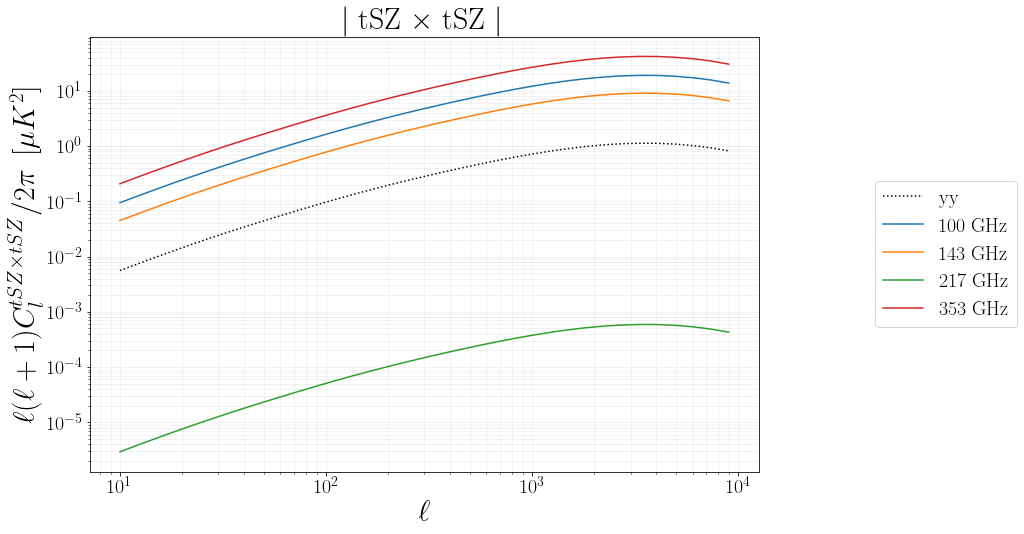

In [6]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{tSZ \times tSZ} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.grid(which='both',alpha=0.2)

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy,":",color="black", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2),label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

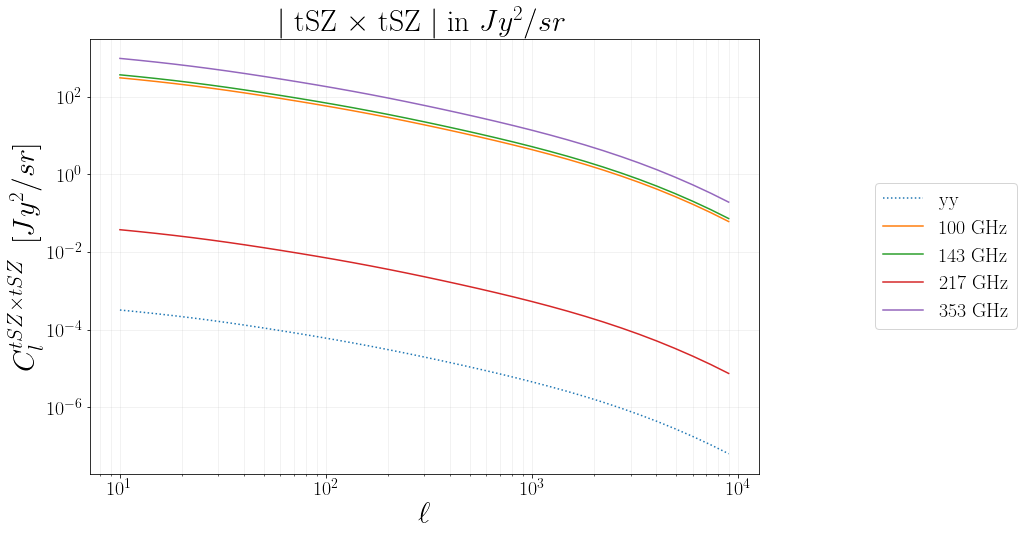

In [7]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$ in $Jy^2/sr$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$  C_l^{tSZ \times tSZ}  \,\,\, [Jy^2/sr]$", size=30)
plt.grid(which='both',alpha=0.2)

ell_yy = np.asarray(cl_sz['ell'])
cls_to_dls = ell_yy*(ell_yy+1.)/2./np.pi

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy/cls_to_dls,":", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)*convert_Jysr_to_uK(nu)**2/cls_to_dls,label=r'%.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

# CIB 

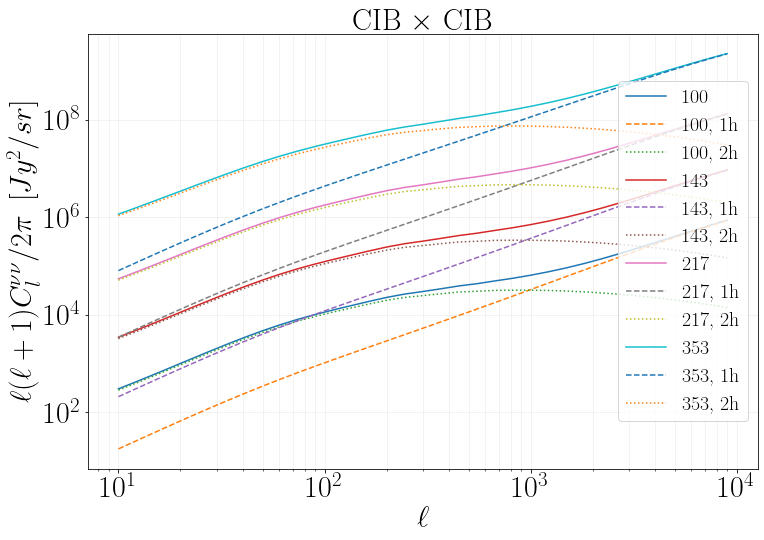

In [8]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

for (i,nu) in enumerate(nu_list):
    #CIB
    ell_cib = cl_cib_cib[str(nu)+'x'+str(nu)]['ell']
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])

    plt.plot(ell_cib, dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
    plt.plot(ell_cib, dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
    plt.plot(ell_cib, dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

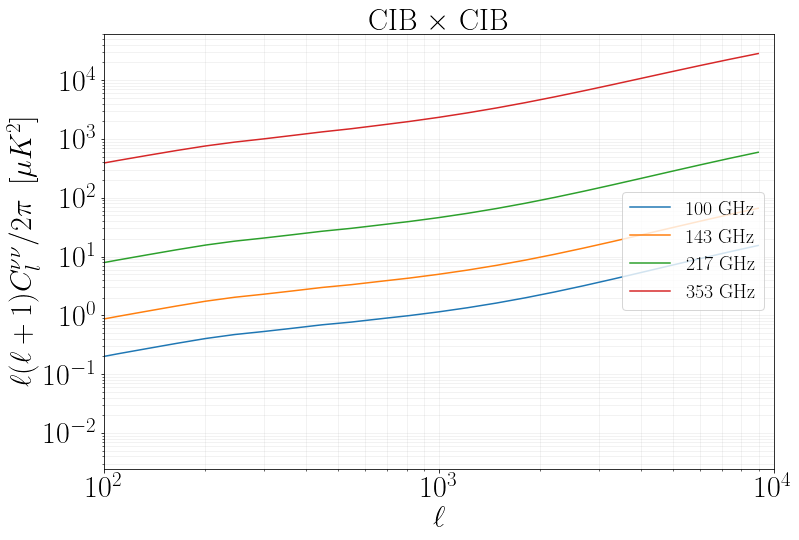

In [9]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])

    plt.plot(ell_cib,(dls_cib_1h + dls_cib_2h)/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu), label=r'%.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

not reproducing Fig 3 in Fiona/Mat but params different ?


# tSZ x CIB

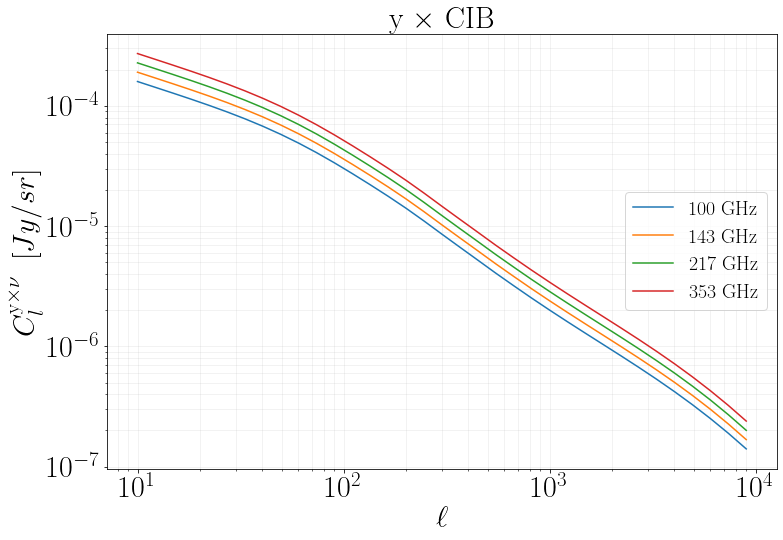

In [10]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)/cls_to_dls,'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

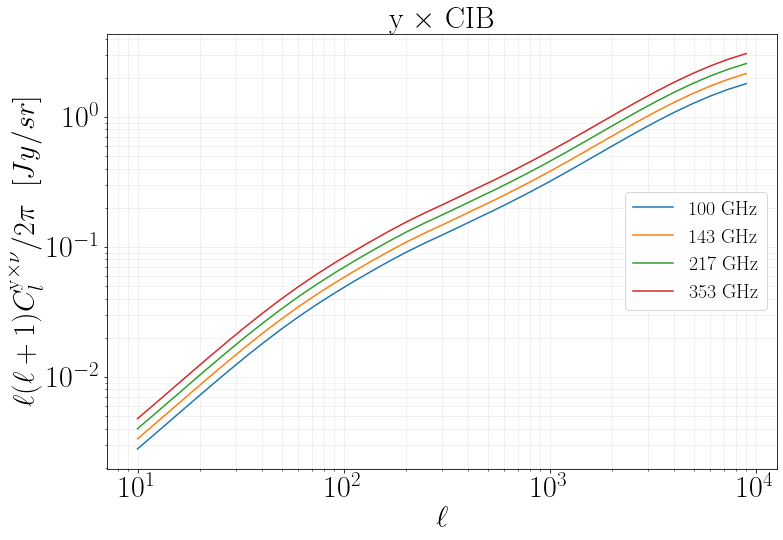

In [11]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [Jy/sr]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h),'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


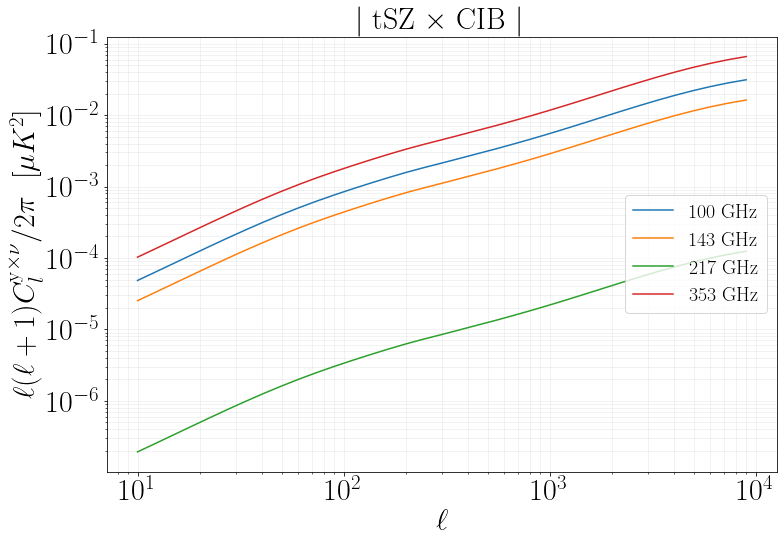

In [12]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [\mu K^2]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'$|$ tSZ $\times$ CIB $|$', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h']) /convert_Jysr_to_uK(nu)
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h']) /convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)),'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

corr = $$

## CIB x tSZ

I am ignoring all the CIB unit conversions and tSZ spectral fuction because it would cancel anyway

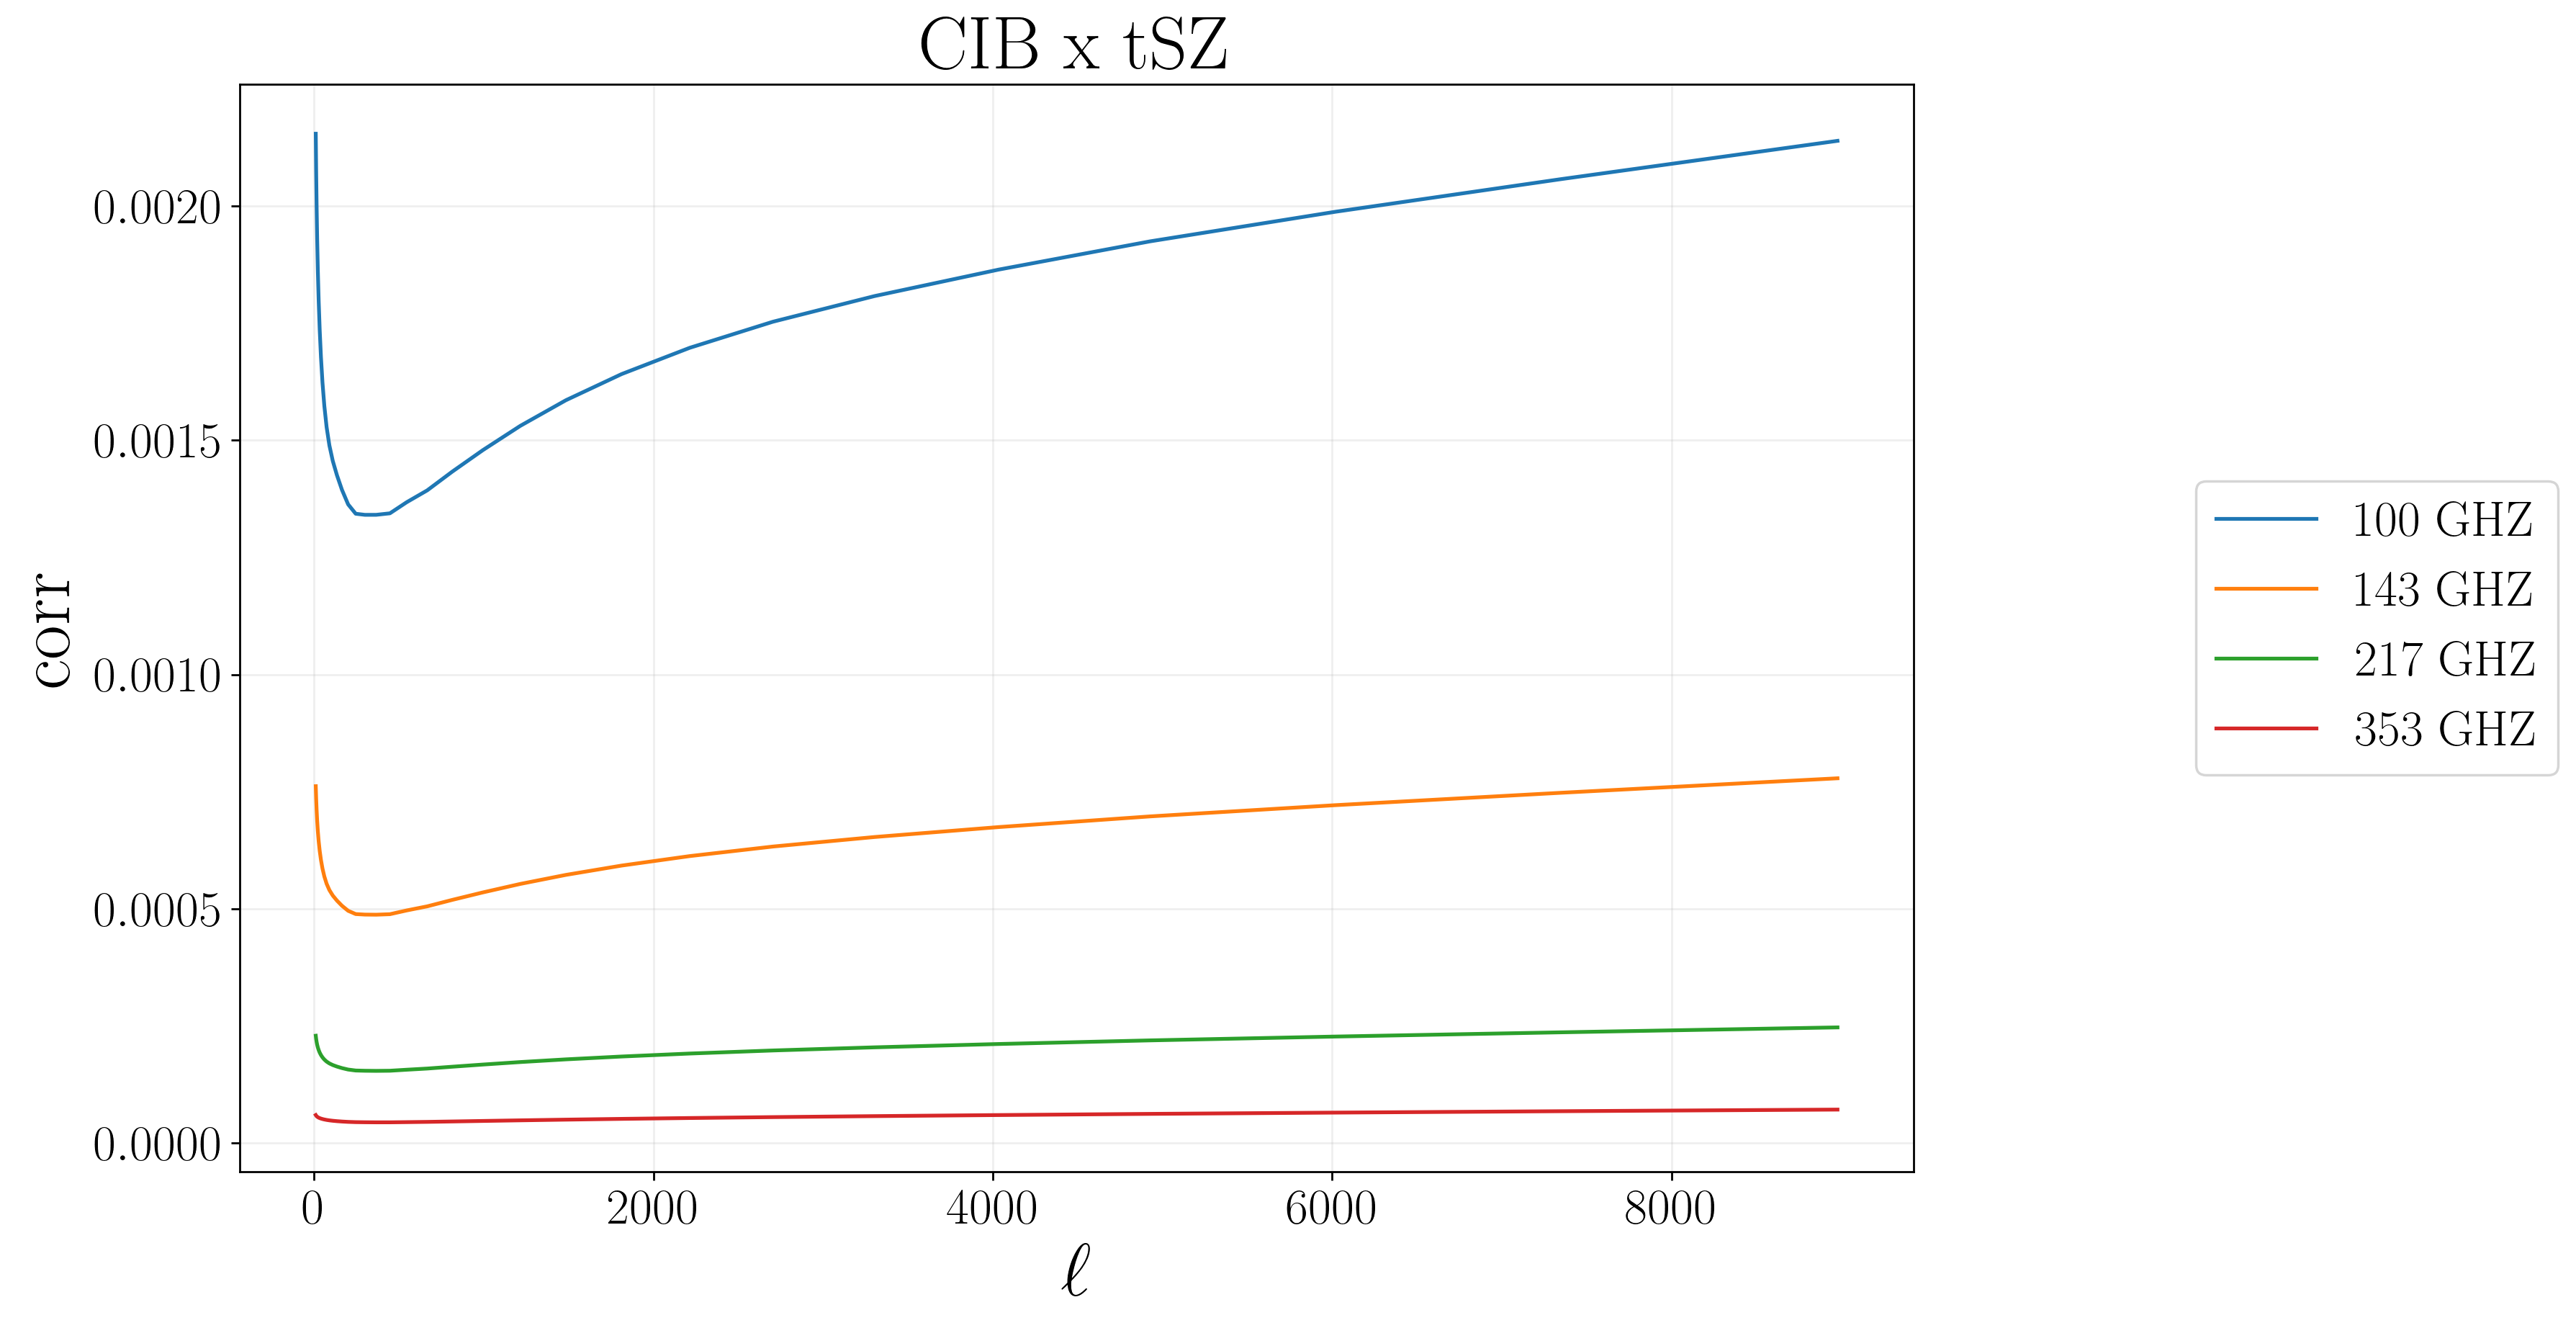

In [13]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)

for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB = (cls_cib_1h+cls_cib_2h) 
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_y_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_y_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBy = (cl_y_cib_1h+cl_y_cib_2h)
    
    #correlation coeff
    corr = CIBy/np.sqrt(CIB*yy)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 